# Files and formats

So far we worked with flat files and csv files. Today we talk a bit more about JSON, and Web API's

Pandas has a number of methods for reading tabular data as a DataFrame object. 

        read_csv
        read_fwf
        read_clipboard
        read_excel
        read_hdf
        read_html
        read_json
        read_msgpack
        read_pickle
        read_sas
        read_sql
        read_stata
        read_feather
        
So far we used most of the time `read_csv`, `read_fwf`, `read_excel`. We experienced that data can be very messy and that we need a lot of different parameters to perform a nice read without errors. Sometimes the data is seperated by variable amount of whitespaces. In these cases we can pass a regular expression as a delimiter for read_csv. 

        data = pd.read_csv('example.txt', sep = '\s+')
        
Other handy methods are

        na_values
        skiprows
        sep
        nrows
        chunksize
        skip_footer
        encoding
        
    
      

## JSON Data

https://www.youtube.com/watch?v=EfEm0g-bMPc

JSON has become one of the standard for sending http requests between webbrowsers and other applications. JSON is very nearly valid Python code using basic types like dictionaries, arrays, strings, numbers and booleans. So far we used `json.loads()` and `json.dumps()` to read and write json files. JSON data can be converted to a dataframe using the built in pandas `pd.read_json` method

In [2]:
import json
db = json.load(open('data/food.json'))
print(db[0:1])
#each entry is a dict, so we select one of these
db[0].keys()

[{'tags': [], 'id': 1008, 'group': 'Dairy and Egg Products', 'nutrients': [{'value': 25.18, 'units': 'g', 'group': 'Composition', 'description': 'Protein'}, {'value': 29.2, 'units': 'g', 'group': 'Composition', 'description': 'Total lipid (fat)'}, {'value': 3.06, 'units': 'g', 'group': 'Composition', 'description': 'Carbohydrate, by difference'}, {'value': 3.28, 'units': 'g', 'group': 'Other', 'description': 'Ash'}, {'value': 376.0, 'units': 'kcal', 'group': 'Energy', 'description': 'Energy'}, {'value': 39.28, 'units': 'g', 'group': 'Composition', 'description': 'Water'}, {'value': 1573.0, 'units': 'kJ', 'group': 'Energy', 'description': 'Energy'}, {'value': 0.0, 'units': 'g', 'group': 'Composition', 'description': 'Fiber, total dietary'}, {'value': 673.0, 'units': 'mg', 'group': 'Elements', 'description': 'Calcium, Ca'}, {'value': 0.64, 'units': 'mg', 'group': 'Elements', 'description': 'Iron, Fe'}, {'value': 22.0, 'units': 'mg', 'group': 'Elements', 'description': 'Magnesium, Mg'}, {

dict_keys(['tags', 'id', 'group', 'nutrients', 'description', 'manufacturer', 'portions'])

In [3]:
import pandas as pd
df = pd.read_json('data/food.json')
df.head()

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'group': 'Comp...","[{'unit': 'oz', 'amount': 1, 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'group': 'Compo...","[{'unit': 'cup, diced', 'amount': 1, 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'group': 'Other...","[{'unit': 'oz', 'amount': 1, 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'group': 'Other'...","[{'unit': 'cup, crumbled', 'amount': 1, 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'group': 'Other...","[{'unit': 'oz', 'amount': 1, 'grams': 28.35}]",[]


The disadvantage of `pd.read_json` is that we create columns with dictionaries. Better is to select the nutrients information from the column and put it in a different dataframe along with the `id` number, so that we can combine the two afterwards. Below you see how the first row and column cell is selected and put in a dataframe. 

In [27]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head(10)

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


To do this for the entire dataframe we need to loop through the dataframe and put each nutrients cell in a dataframe, add the `id` column for identification purpose. If we first create a list of all these dataframes and then concat them we have one single dataframe for all the nutrients cells in the original dataframe.

In [29]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [30]:
nutrients[150:250]

,description,group,units,value,id
150,Arginine,Amino Acids,g,0.952,1008
151,Histidine,Amino Acids,g,0.884,1008
152,Alanine,Amino Acids,g,0.711,1008
153,Aspartic acid,Amino Acids,g,1.618,1008
154,Glutamic acid,Amino Acids,g,6.160,1008
155,Glycine,Amino Acids,g,0.439,1008
156,Proline,Amino Acids,g,2.838,1008
157,Serine,Amino Acids,g,1.472,1008
158,Cholesterol,Other,mg,93.000,1008
159,"Fatty acids, total saturated",Other,g,18.584,1008


In [31]:
#check for duplicates
print(len(nutrients))
nutrients.duplicated().sum()

389355


14179

In [32]:
nutrients = nutrients.drop_duplicates()

In [33]:
print(len(nutrients))
nutrients.duplicated().sum()

375176


0

Since we put the nutrients info in a seperate dataframe we can eliminate that from the original database

In [34]:
columns_to_keep = ['description',
                   'group',
                   'id',
                   'manufacturer']
df = df[columns_to_keep]
df.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Now we reduced the dimensions in the dataframes we can easily merge them. First we rename the columns that are in both dataframes 

In [35]:
df = df.rename(columns = {'description':'food', 'group':'food_group'}, copy = False)

In [36]:
df.head()

,food,food_group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [37]:
nutrients = nutrients.rename(columns = {'description':'nutrients', 'group': 'nutrient_group'})
nutrients.head()

,nutrients,nutrient_group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [38]:
ndata = pd.merge(nutrients, df, on='id', how='outer')
ndata.head(20)

,nutrients,nutrient_group,units,value,id,food,food_group,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


With the merged data we can conduct any analysis we like

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<IPython.core.display.Javascript object>


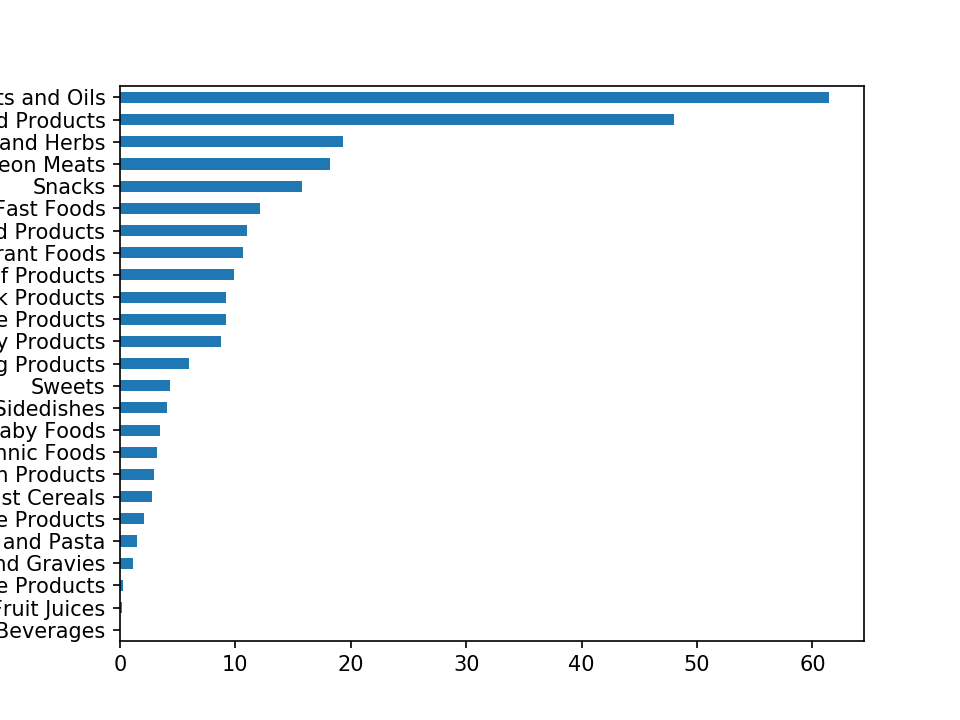

In [39]:
%matplotlib notebook
result = ndata.groupby(['nutrients', 'food_group'])['value'].quantile(0.5)
result['Total lipid (fat)'].sort_values().plot(kind='barh')

## Retrieving data troughout API's

API stands for Application Programming Interface. It is the interface that allows software applications to communicate with one another. An API is a software-to-software interface, not a user interface. With APIs, applications talk to each other without any user knowledge or intervention.


An example is the Twitter API. It is a web-based JSON API that allows developers to programmatically interact with Twitter data. The Twitter API is a web-based API. It must be accessed by making requests over the Internet to services that Twitter hosts. With a web-based API such as Twitter’s, your application sends an HTTP request, just like a web browser does. But instead of the response being delivered as a webpage, for human understanding, it’s returned in a format that applications can easily parse. Various formats exist for this purpose, and Twitter uses a popular and easy-to-use format called JSON. 

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret.  If you to https://apps.twitter.com/ and log in with your twitter credentials you can create a New App and get the API key credentials for yourself.

For the twitter API we need the tweepy library see https://tweepy.readthedocs.io/en/latest/

In [ ]:
#source: http://adilmoujahid.com/posts/2014/07/twitter-analytics/
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = token
access_token_secret = secret_token
consumer_key = api_key
consumer_secret = api_secret_key


#This is a basic listener that just stores tweets in json file
class StdOutListener(StreamListener):

    def on_data(self, data):
        with open('data/result2.json', 'a') as f:
            f.write(data)
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords
    stream.filter(track=['Sunday'])

Since this is a JSON format we can process the data accordingly

In [14]:
import json
tweets_data_path = 'data/result2.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

    

In [15]:
print(len(tweets_data))

3


In [16]:
import pandas as pd
tweets = pd.DataFrame(tweets_data)
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_tweet,favorite_count,favorited,filter_level,geo,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,None,None,Sun May 19 17:53:12 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",{'full_text': 'Can we put this out to the spor...,0,False,low,None,...,1130144770255413248,{'expanded': 'https://twitter.com/girlontheriv...,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Can we put this out to the sports med communit...,1558288392774,True,"{'listed_count': 49, 'following': None, 'defau..."
1,None,None,Sun May 19 17:56:17 +0000 2019,"[12, 130]","{'hashtags': [], 'urls': [], 'symbols': [], 'u...",NaN,0,False,low,None,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@mboyle1959 I might clarify that the “low” end...,1558288577756,False,"{'listed_count': 3, 'following': None, 'defaul..."
2,None,None,Sun May 19 17:59:11 +0000 2019,NaN,"{'hashtags': [], 'urls': [{'expanded_url': 'ht...",{'full_text': 'Mechanical efficiency of high v...,0,False,low,None,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Mechanical efficiency of high versus moderate ...,1558288751178,True,"{'listed_count': 18, 'following': None, 'defau..."


In [23]:
tweets['text']

0    Can we put this out to the sports med communit...
1    @mboyle1959 I might clarify that the “low” end...
2    Mechanical efficiency of high versus moderate ...
Name: text, dtype: object

### some useful regex methods

In [18]:
def extract_link(text):
    import re
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [24]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))
tweets['link']

0    https://t.co/4ne1XxaIVi
1                           
2    https://t.co/74eXuY4uG0
Name: link, dtype: object

In [20]:
def word_in_text(word, text):
    import re
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [21]:
tweets['sport'] = tweets['text'].apply(lambda tweet: word_in_text('sport', tweet))

In [26]:
tweets['sport']

0     True
1    False
2    False
Name: sport, dtype: bool

## Challenge

Try to read the sql file in the data directory. More information is to be found here https://github.com/fenna/twitter_analysis